In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
dftt=pd.read_csv('titanic_train.csv')

In [3]:
dftt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
dftt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:

dftt.shape

(891, 12)

In [51]:
dftt.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
#checking for missing values in the feature 
dftt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
#dftt.dropna(axis=0,inplace=True)

In [5]:
dftt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [55]:

dftt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dftt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [57]:
# Separating the numerical column and categorical column
numerical=[]
categorical=[]
for i in dftt.columns:
    if dftt[i].dtypes=='object':
        categorical.append(i)
    else:
        numerical.append(i)

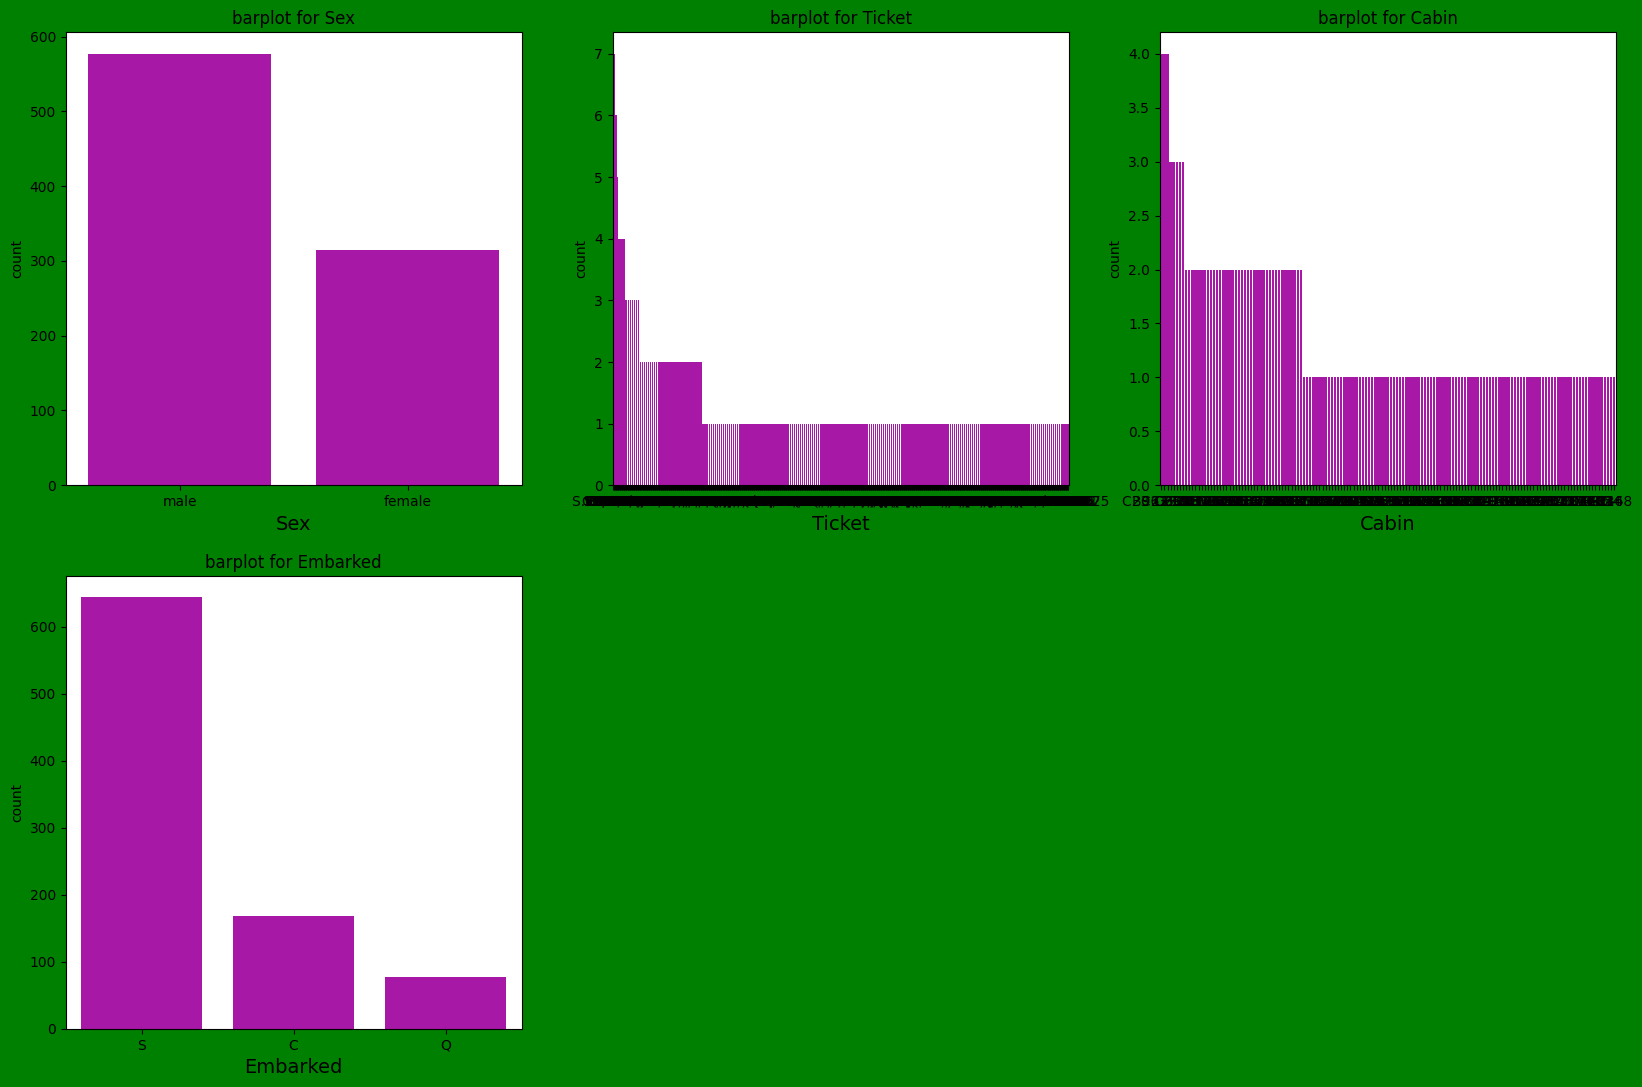

<Figure size 640x480 with 0 Axes>

In [58]:
#categorical columns
plt.figure(figsize=(20,20),facecolor='green')
counter=1
for i in categorical[1:]:
    ax=plt.subplot(3,3,counter)
    sns.barplot(dftt[i].value_counts(),color='m')
    plt.xlabel(i,fontsize=14)
    plt.title(f"barplot for {i}")

    counter+=1
plt.show()
plt.tight_layout()

key observation :
1.here from the above observation it is clear that male passenger are more as compared to the female passenger.
2.Most of the passenger embarked or board from southampton,france and which is the first port that passenger boarded
rest plot are little bit messy so its diffult to get insight from that


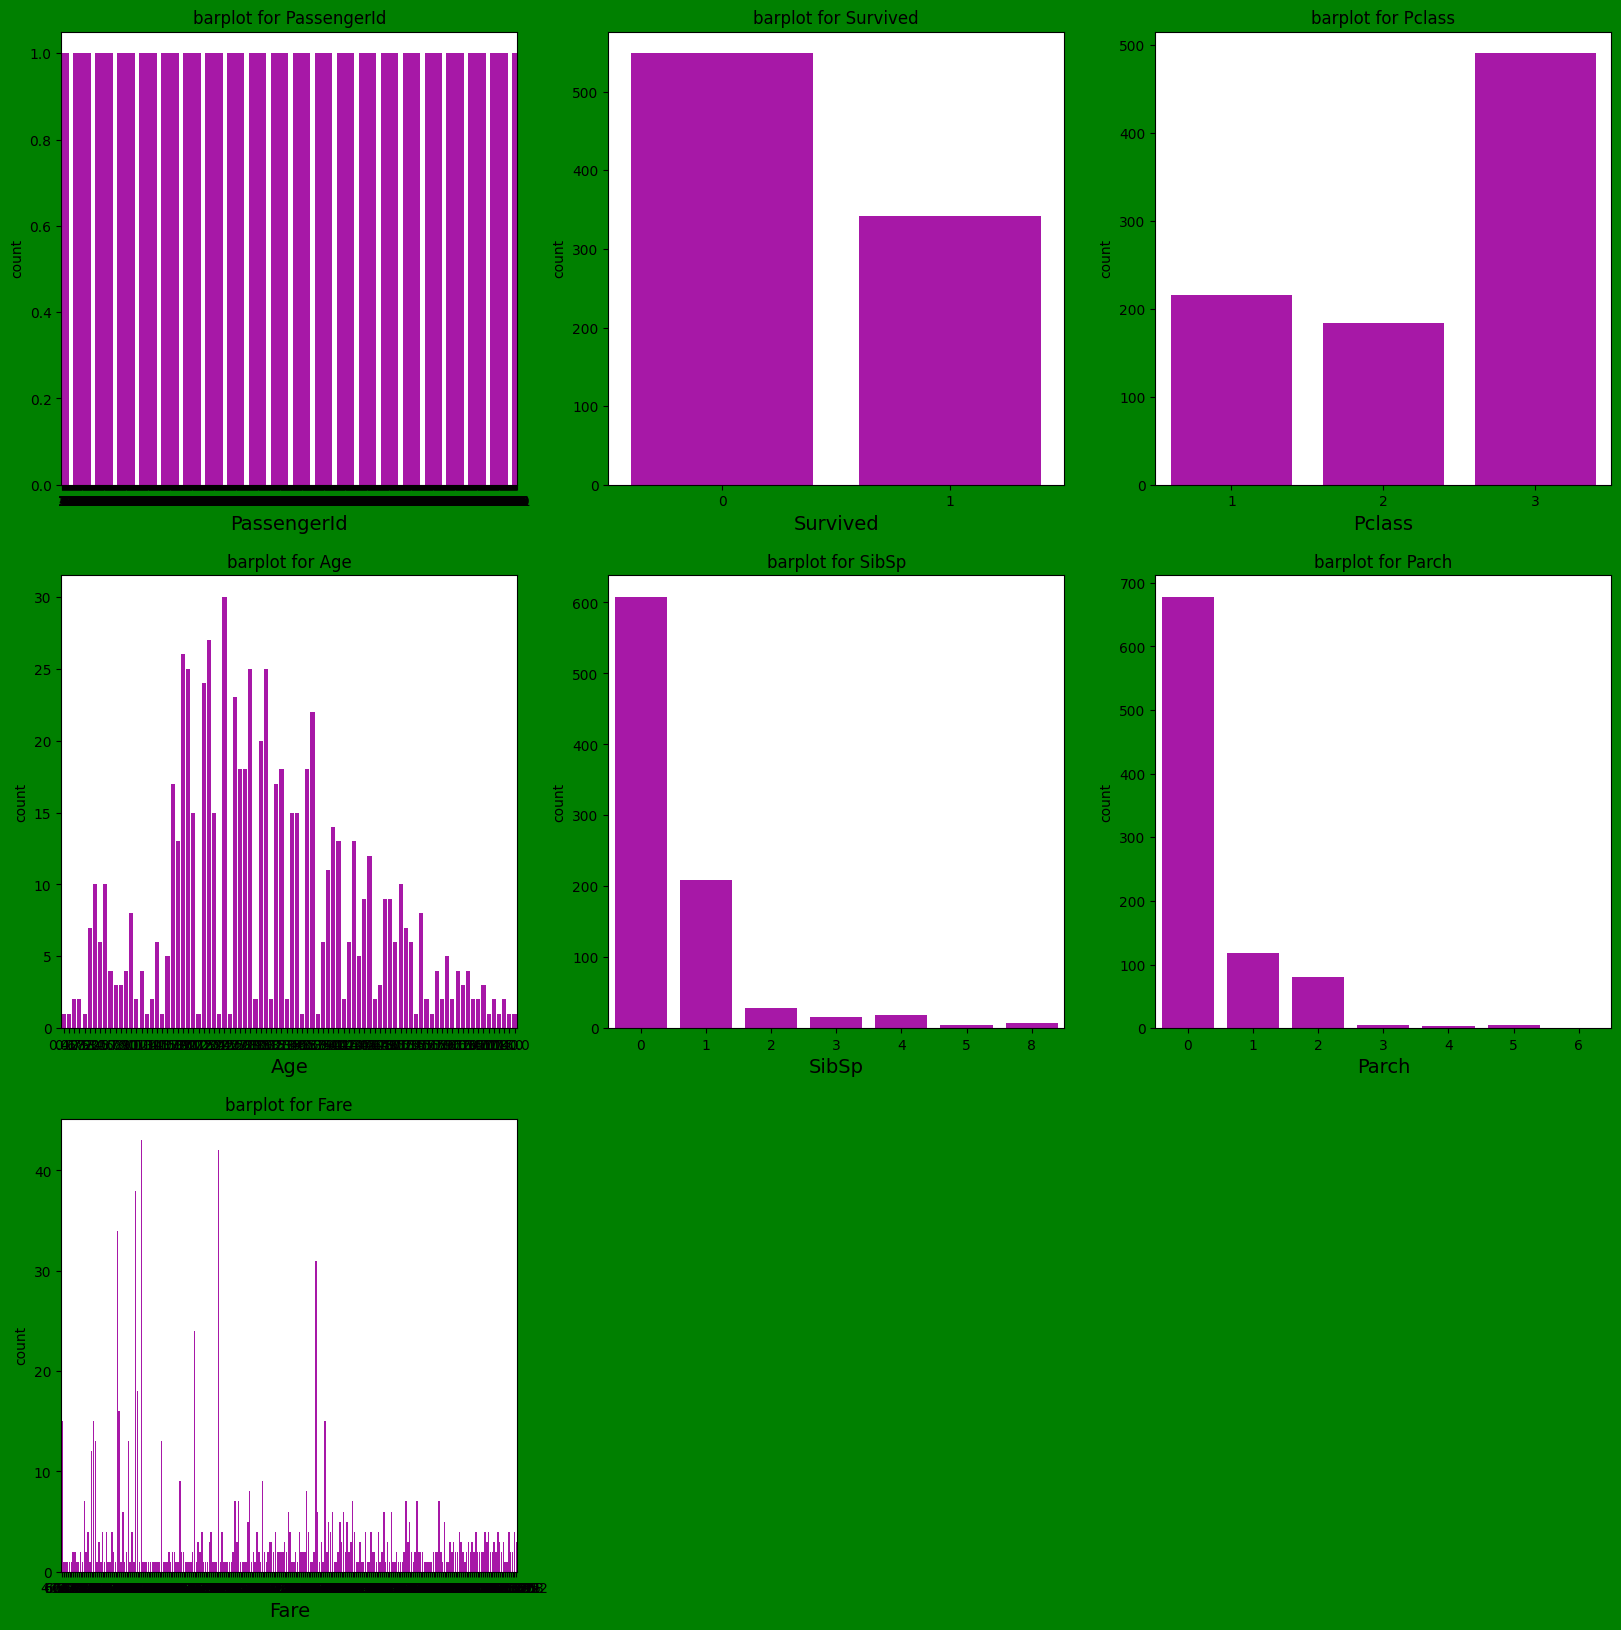

<Figure size 640x480 with 0 Axes>

In [60]:
#numerical columns
numerical 
plt.figure(figsize=(20,20),facecolor='green')
counter=1
for i in numerical:
    ax=plt.subplot(3,3,counter)
    sns.barplot(dftt[i].value_counts(),color='m')
    plt.xlabel(i,fontsize=14)
    plt.title(f"barplot for {i}")

    counter+=1
plt.show()
plt.tight_layout()

key observations:
        1.survived: from the barplot of survived feature it is clear that around 300 people survived and more than 800 peopele died
        2.Pclass: from the barplot it is clear that around 450 passenger are travelling in third class and around 180 passenger are travelling in second class and around 220 passenger are travelling in first class
        3. Sibsp: from the bar plot it is clear that passenger with 0 sibling/spouse are more in  number and it is around 600 passenger . passenger with 1 sibling/spouse  are around 100 and passeneger with 2 sibling/spouse are around 20 is very less
        4.parch:here from the barplot it is clear that the passenger with  their 0 parent/child are more.passenger around 680 and passenger with 1 parent/children are around 100

In [61]:
for i in categorical[1:]:
    print(dftt[i].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [15]:
print(pd.pivot_table( dftt,index='Survived',values=['Age','SibSp','Parch','Fare']))

                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


1.here from the above pivot table it is clear that the passener with average age 28 survived more as compared to the passenger with average age 30
2.the passenger who paid higher fare have more chance of survival as compared to passenger who paid less fair.
3.passenger have higher chance of survival who are along with their parent
4 passenger with sibling/spouse have less chance of survival

In [62]:
# Analysis for categorical column 
print(pd.pivot_table(dftt,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


here from the above absorvation it clear that passenge who is travelling in first class survived more as compared to the passenger with second class and third class.so it is confirmed that rich people can save their life by the power of money

In [63]:
print(pd.pivot_table(dftt,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


In [ ]:
here from the observation it is clear that the female passenger survived more as compared to male passenger.

In [64]:
print(pd.pivot_table(dftt,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


from the above observation it is properly clear but might be the passenger that board from the port cherbourg has highest chance of survival

In [65]:
dftt['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [66]:
dftt.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [67]:
dftt['Survived']=dftt['Survived'].astype(dtype=np.int64)

In [68]:
dftt.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [23]:
dftt.shape

(891, 12)

<Axes: xlabel='Survived', ylabel='count'>

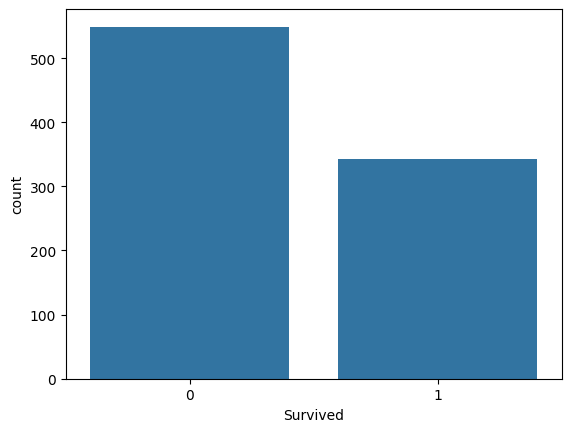

In [69]:
sns.countplot(x='Survived',data=dftt)

PassengerId       Axes(0.125,0.77;0.110714x0.11)
Survived       Axes(0.257857,0.77;0.110714x0.11)
Pclass         Axes(0.390714,0.77;0.110714x0.11)
Age            Axes(0.523571,0.77;0.110714x0.11)
SibSp          Axes(0.656429,0.77;0.110714x0.11)
Parch          Axes(0.789286,0.77;0.110714x0.11)
Fare             Axes(0.125,0.638;0.110714x0.11)
dtype: object

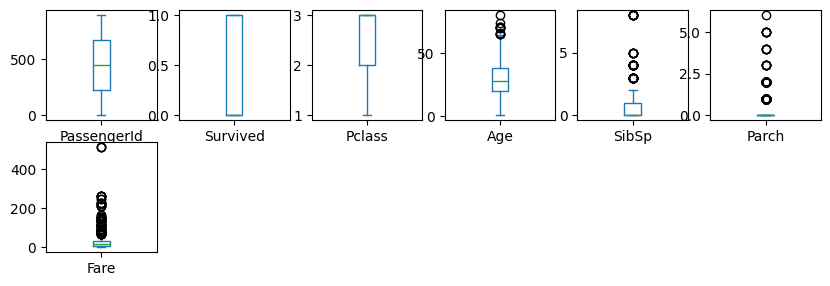

In [70]:
dftt.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

here from the above boxplot it is clear that in the feature Age,SibSp Parch and Fare outliers are present but for this project if we consider Age fetaure then as we know that along with child ,adult senior citizen are also in the ship so genuinely age gap will be there and also price of the fare will be high or low based n the Pclass.so as my opinion it is better not to remove outliers from the feature.

<Axes: xlabel='Survived', ylabel='Sex'>

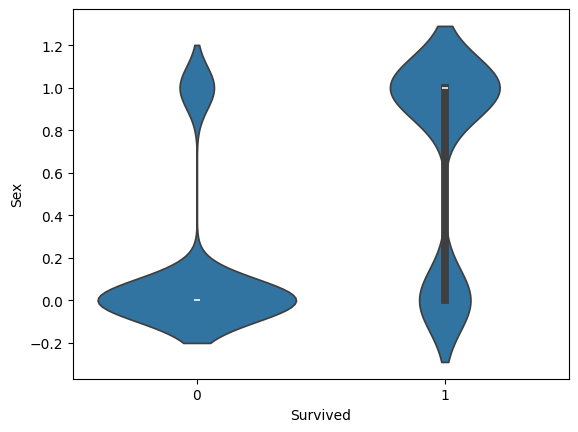

In [188]:
sns.violinplot(x='Survived',y='Sex',data=dftt)

In [71]:
dftt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='Pclass'>

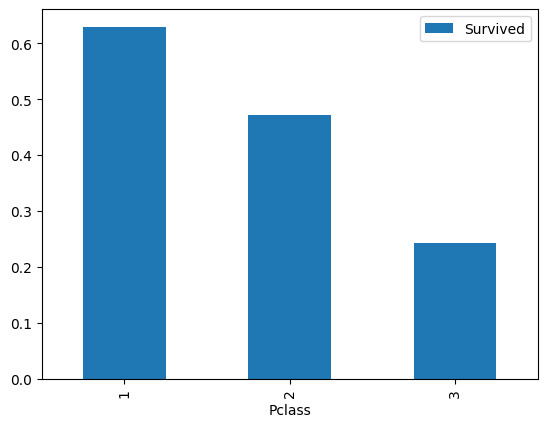

In [72]:
dftt[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [ ]:
Here as per the bargraph Pclass 1 has survived more than the Pclass 2 and 3

<Axes: xlabel='Pclass'>

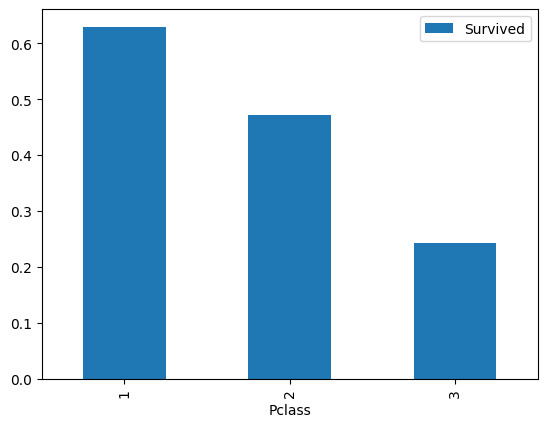

In [73]:
dftt[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

<Axes: xlabel='Pclass', ylabel='count'>

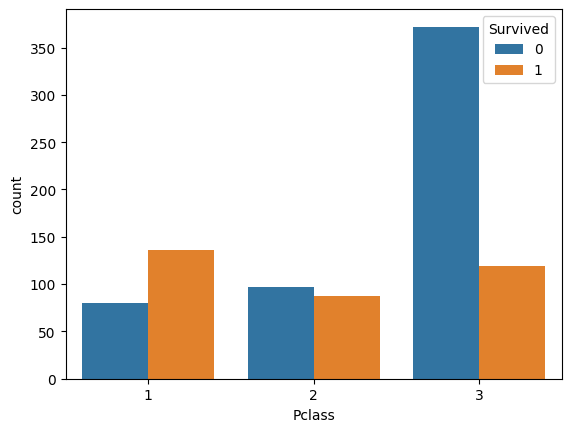

In [189]:
sns.countplot(x='Pclass',hue='Survived',data=dftt)

<Axes: xlabel='Sex', ylabel='count'>

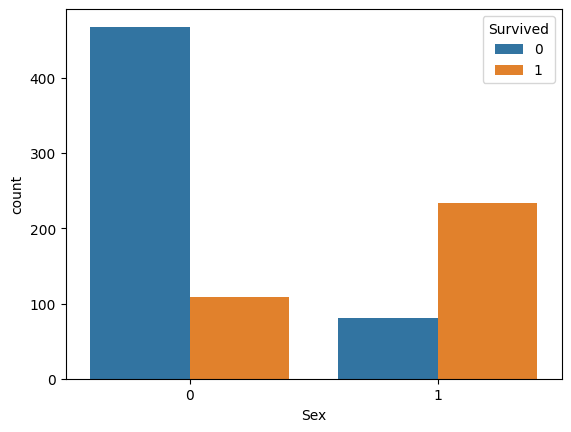

In [190]:
sns.countplot(x='Sex',hue='Survived',data=dftt)

In [ ]:
from the above graph it is clear that around 100 male survied and 480 man died and in case of female 250 female survived and 80 female died

<Axes: xlabel='SibSp', ylabel='count'>

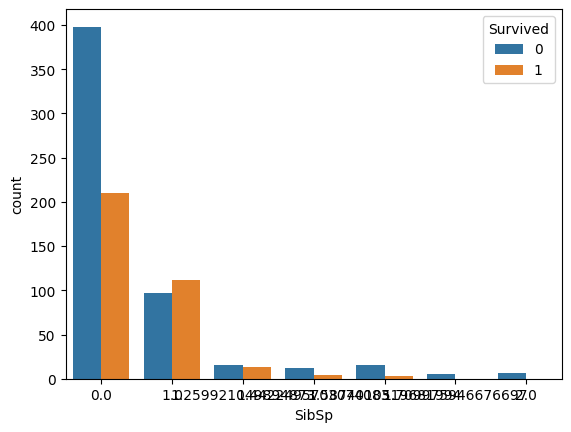

In [191]:
sns.countplot(x='SibSp',hue='Survived',data=dftt)

<Axes: xlabel='Parch', ylabel='count'>

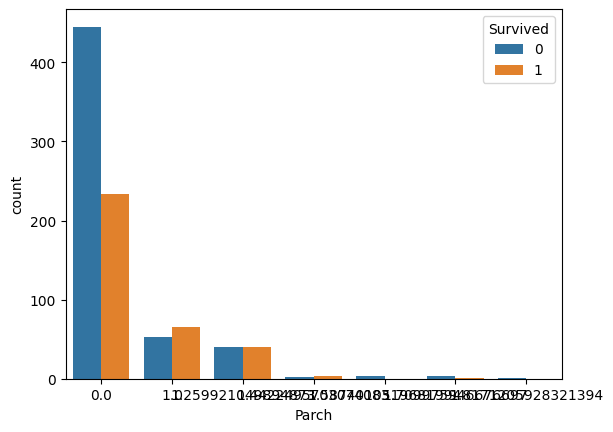

In [192]:
sns.countplot(x='Parch',hue='Survived',data=dftt)

<Axes: xlabel='Embarked', ylabel='count'>

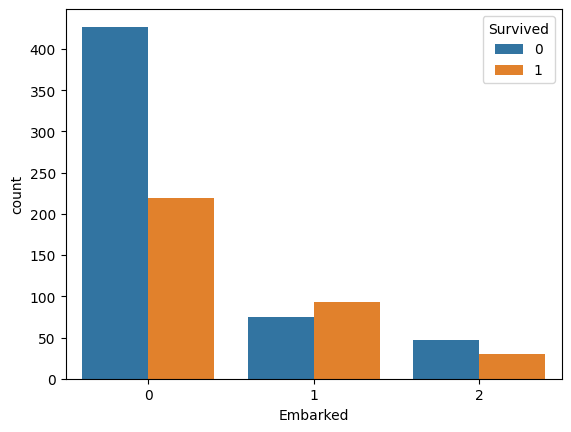

In [193]:
sns.countplot(x='Embarked',hue='Survived',data=dftt)

In [ ]:
passenger board from Southhampton are more likely to survive as compared to the person boarded from cherbourg and Queentowns

Text(0, 0.5, 'count')

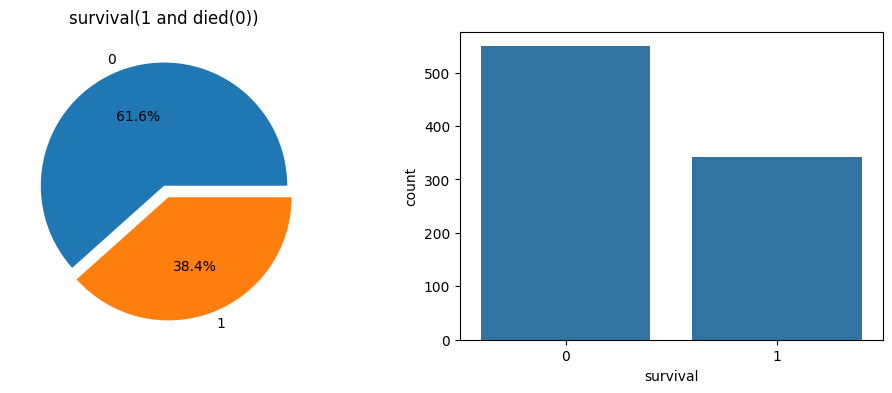

In [194]:
f,ax=plt.subplots(1,2,figsize=(12,4))
dftt['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0])
ax[0].set_title('survival(1 and died(0))')
ax[0].set_ylabel('')
sns.countplot(data=dftt,x="Survived",ax=ax[1])
ax[1].set_xlabel('survival')
ax[1].set_ylabel('count')

In [ ]:
                                Data Pre-processing

In [80]:
dftt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

here in the dataset age and cabin missing values so we have to handle carefully.we have seen during feature Analysis that cabin column doesnt have any importance and also it has large no of missing values so it is better to drop the cabin feature

In [81]:
dftt = dftt.drop(columns='Cabin', axis=1)

In [82]:
dftt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
#here i am replacing the missing value of Age feature with their mean
dftt['Age'].fillna(dftt['Age'].mean(), inplace=True)


In [8]:
dftt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [9]:
dftt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#here from the above out it is confirmed that for Age feature missing value has been handled properly

In [10]:
#here to handle missing value in Embarked Feature i am just checking the mode for the most frequent Embarked used so it is clear that most passenger board from Southhampton

dftt['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
dftt['Embarked'].fillna(dftt['Embarked'].mode()[0],inplace=True)

In [13]:
dftt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#now all the missing values in the fature has been handled properly

In [18]:
#now its turn to convert all the value of categorical type into numerical type
dftt.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [90]:
dftt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [12]:
dftt=dftt.drop('Cabin',axis=1)

In [16]:
dftt=dftt.drop(['Name'],axis=1)

In [20]:
# here from the analysis that name and Ticket  and passenger id feature are not relevant so its better to remove from the dataset
dftt=dftt.drop(['Ticket'],axis=1)

In [92]:
dftt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [29]:
correlation=dftt.corr()

<Axes: >

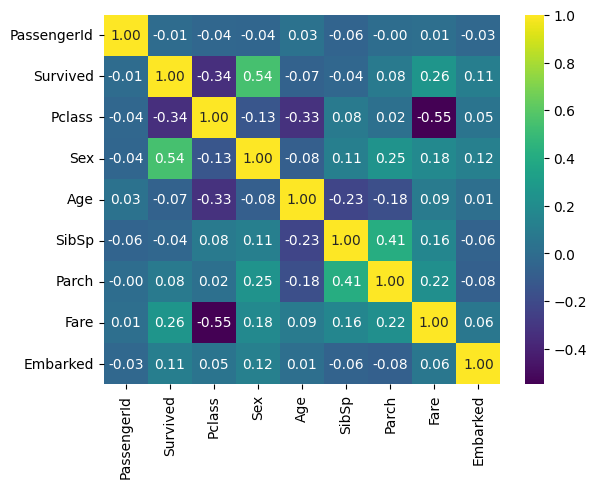

In [30]:
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

key observation:
Survived that is taret variable is negatively correlated with Pclass it means if passenger are travel in higher order of class survival ratio will decrease it means if passenger are travelling in class 3 then likely to have no chance of survival
Pclass is also negatively correlated with fare it means if the Pclass no increases fare decreases(if pasenger travells in class 3 then fare will decrease as compared tp class 2

In [105]:
dftt.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       1.033059
Parch       1.348334
Fare        1.230382
Embarked    1.543397
dtype: float64

In [ ]:
Here we can see that skewness is present in the data set to remove the the skewness i will use np.cbrt() here 

In [100]:
#dftt['SibSp']=stats.boxcox(dftt['SibSp'])
dftt['SibSp']=np.cbrt(dftt['SibSp'])

In [102]:
dftt['Parch']=np.cbrt(dftt['Parch'])

In [104]:
dftt['Fare']=np.cbrt(dftt['Fare'])

In [106]:
dftt.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       1.033059
Parch       1.348334
Fare        1.230382
Embarked    1.543397
dtype: float64

In [ ]:
here in some feature the skew value is +1 means it moderately skewed

C:\Program Files\KMSpico\temp\ipykernel_12144\3537153670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dftt['Survived'])


<Axes: xlabel='Survived', ylabel='Density'>

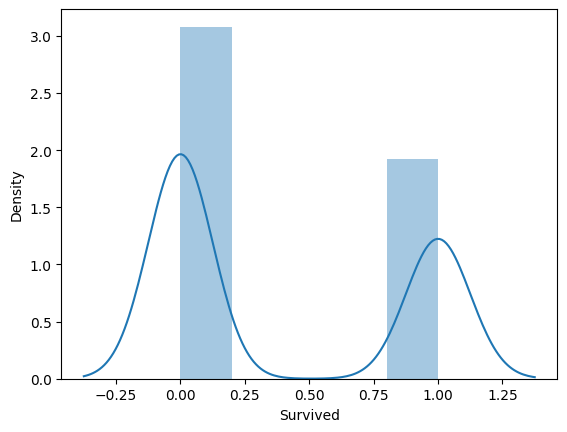

In [107]:
sns.distplot(dftt['Survived'])

In [ ]:
#splitting the dataset and storing all independent feature into x and target feature into y 

In [113]:
x=dftt.drop(columns='Survived',axis=1)

In [124]:
y=dftt.iloc[:,0]

In [125]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scale_data_x=StandardScaler()
x=pd.DataFrame(scale_data_x.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.737695,-0.592481,1.187523,-0.551654,-0.774708,-0.568837
1,-1.566107,1.355574,0.638789,1.187523,-0.551654,1.287903,1.005181
2,0.827377,1.355574,-0.284663,-0.660582,-0.551654,-0.720325,-0.568837
3,-1.566107,1.355574,0.407926,1.187523,-0.551654,0.926230,-0.568837
4,0.827377,-0.737695,0.407926,-0.660582,-0.551654,-0.710596,-0.568837
...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.660582,-0.551654,-0.386703,-0.568837
887,-1.566107,1.355574,-0.823344,-0.660582,-0.551654,0.318502,-0.568837
888,0.827377,1.355574,0.000000,1.187523,1.999751,0.089990,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.660582,-0.551654,0.318502,1.005181


In [129]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,2.197227,Pclass
1,1.133982,Sex
2,1.231139,Age
3,1.421862,SibSp
4,1.499314,Parch
5,2.463868,Fare
6,1.048339,Embarked


In [ ]:
# here it is clear that the vif values are in acceptable range from -5 to +5 

In [131]:
from imblearn.over_sampling import SMOTE

In [132]:
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)


In [133]:
x1.value_counts()

Pclass     Sex        Age        SibSp      Parch      Fare       Embarked 
 0.827377   1.355574   0.000000  -0.660582  -0.551654  -0.734118   2.579199    13
           -0.737695   0.000000  -0.660582  -0.551654  -0.722612  -0.568837    13
                                                       -0.710596  -0.568837    12
                                                       -0.734118   2.579199    10
-0.369365  -0.737695   0.000000  -0.660582  -0.551654  -2.580348  -0.568837     6
                                                                               ..
                      -0.053800   1.187523  -0.551654   0.243148   1.005181     1
                      -0.000546  -0.660582  -0.551654  -0.403133  -0.568837     1
                       0.000000  -0.660582  -0.551654  -0.386703  -0.568837     1
                                                       -0.339224   1.005181     1
 0.827377   1.355574   2.562648  -0.660582  -0.551654  -0.598424  -0.568837     1
Name: count, Length: 9

In [134]:
x1.shape

(1098, 7)

In [135]:
y1.shape

(1098,)

In [136]:
y1.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [ ]:
here now the target variable has balanced dataset for both the survival and died

                        MODEL BUILDING PART HAS BEEN initiated 

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [138]:
maxac=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.8666666666666667 at random state 18


In [139]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       159
           1       0.86      0.79      0.82       171

    accuracy                           0.82       330
   macro avg       0.83      0.83      0.82       330
weighted avg       0.83      0.82      0.82       330



In [140]:
c_matrix=confusion_matrix(y_test,pred)
print(c_matrix)

[[137  22]
 [ 36 135]]


Text(45.722222222222214, 0.5, 'actual value')

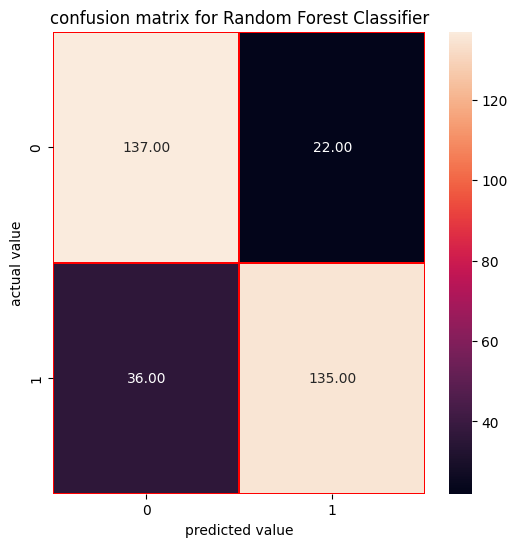

In [141]:
              #printing confusion matrics using heatmap()
x_labels=['0','1']
y_labels=['0','1']
plt.figure(figsize=(6,6))
sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
plt.title('confusion matrix for Random Forest Classifier')
plt.xlabel('predicted value')
plt.ylabel('actual value')


In [142]:
def classification_models(model,x,y,x_test,y_test):
     
    model.fit(x,y)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



0.7545454545454545
[[121  38]
 [ 43 128]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       159
           1       0.77      0.75      0.76       171

    accuracy                           0.75       330
   macro avg       0.75      0.75      0.75       330
weighted avg       0.76      0.75      0.75       330



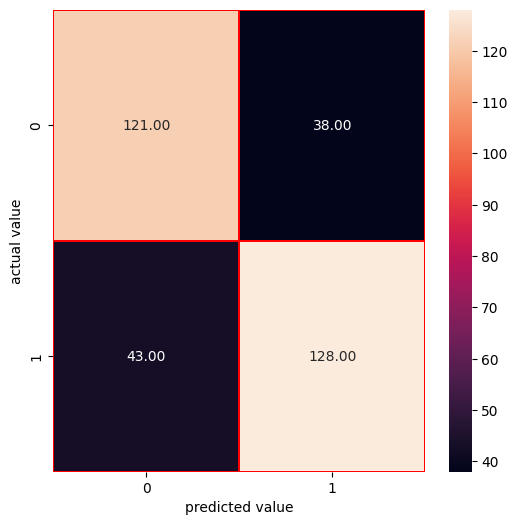

In [143]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.793939393939394
[[136  23]
 [ 45 126]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       159
           1       0.85      0.74      0.79       171

    accuracy                           0.79       330
   macro avg       0.80      0.80      0.79       330
weighted avg       0.80      0.79      0.79       330



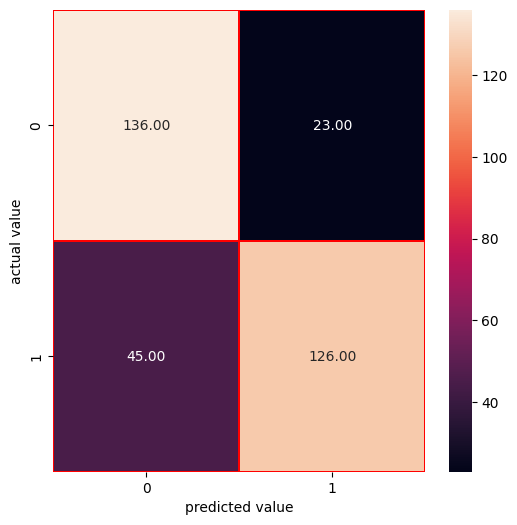

In [144]:
svc=SVC()
classification_models(svc,x_train,y_train,x_test ,y_test)

0.8181818181818182
[[135  24]
 [ 36 135]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       159
           1       0.85      0.79      0.82       171

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



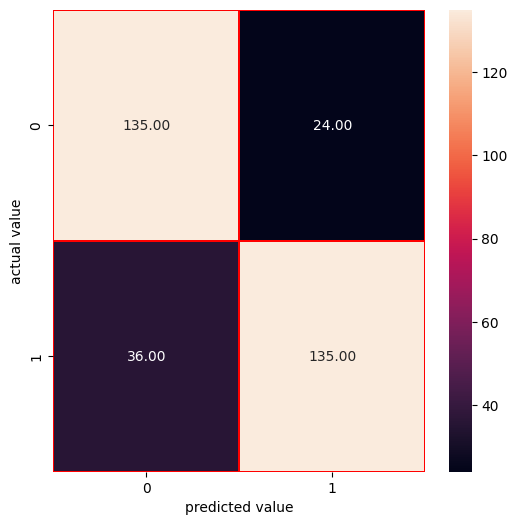

In [145]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.8333333333333334
[[142  17]
 [ 38 133]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       159
           1       0.89      0.78      0.83       171

    accuracy                           0.83       330
   macro avg       0.84      0.84      0.83       330
weighted avg       0.84      0.83      0.83       330



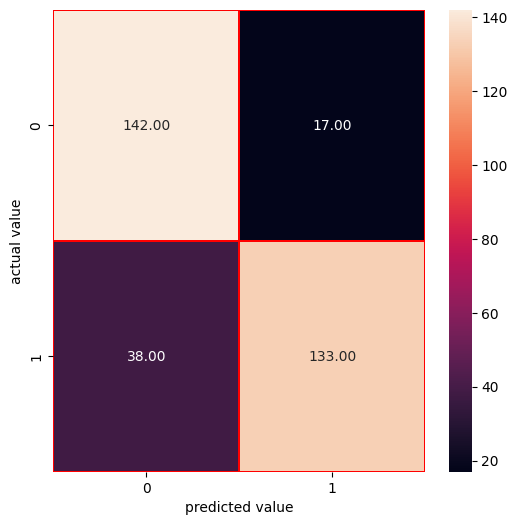

In [146]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.8212121212121212
[[135  24]
 [ 35 136]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       159
           1       0.85      0.80      0.82       171

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



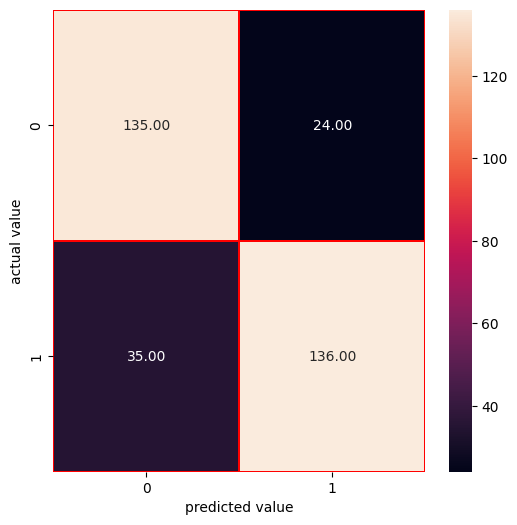

In [147]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.7878787878787878
[[124  35]
 [ 35 136]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       159
           1       0.80      0.80      0.80       171

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



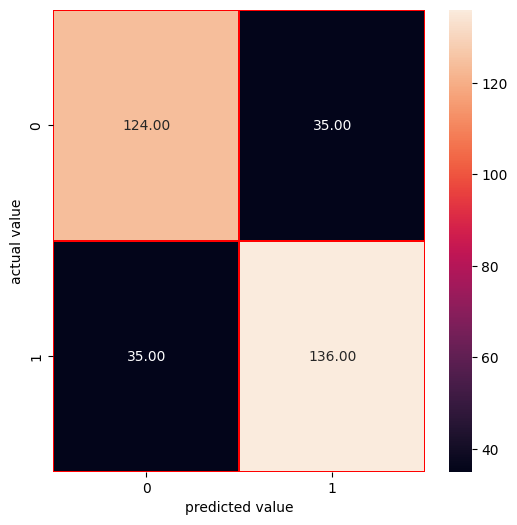

In [148]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

In [149]:
def cross_validation(model,x1,y1):
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [150]:
cross_validation(LR,x1,y1)

[0.78181818 0.80454545 0.75       0.78995434 0.78995434]
0.7832544624325446
differnce between accuracy score and cross validation is -0.028709007887090077


In [151]:
cross_validation(RFC,x1,y1)

[0.78181818 0.82727273 0.82272727 0.85844749 0.85844749]
0.8297426317974264
differnce between accuracy score and cross validation is -0.0055002075550021345


In [152]:
cross_validation(etc,x1,y1)

[0.76818182 0.81818182 0.81363636 0.8630137  0.83105023]
0.8188127853881279
differnce between accuracy score and cross validation is -0.0006309672063096183


In [153]:
#checking cross validation for GradientBoostingClassifier
cross_validation(gbc,x1,y1)

[0.79545455 0.81818182 0.80909091 0.8630137  0.83561644]
0.8242714819427148
differnce between accuracy score and cross validation is 0.009061851390618547


In [154]:
# checking cross validaton for decision tree classifer
cross_validation(dtc,x1,y1)

[0.76818182 0.79545455 0.8        0.85388128 0.82648402]
0.8088003320880033
differnce between accuracy score and cross validation is -0.020921544209215437


In [ ]:
# here in this project GradientBoostingClassifier algorithm is giving best performance as compared to other algorithms tested above

In [ ]:
f

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameters={'criterion':['gini','entropy'],'random_state':[10,30,50,60,900],'max_depth':[0,10,20,30,40],'n_jobs':[-3,-2,-1,1,2],'n_estimators':[50,100,150,200,250]}

In [157]:

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [183]:
final_model=RandomForestClassifier(criterion='gini',max_depth=50,n_estimators=500,n_jobs=-3,random_state=135)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*100)

83.33333333333334


In [169]:
from sklearn import metrics

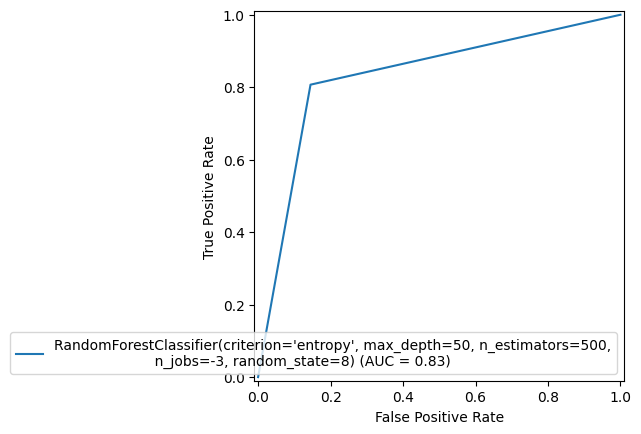

In [170]:
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
disp=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
disp.plot()

In [171]:
import joblib
joblib.dump(final_model,'Titanic_project.pkl')

['Titanic_project.pkl']

In [174]:
prediction=final_model.predict(x_test)
prediction

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [175]:
dummy_test=np.array(y_test)


In [176]:
dummy_test

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,

In [177]:
df=pd.DataFrame()
df['orignal']=dummy_test
df['prediction']=prediction
df

,orignal,prediction
0,1,1
1,1,0
2,1,1
3,1,1
4,0,1
...,...,...
325,0,0
326,0,0
327,0,0
328,1,1


In [198]:
df.iloc[200:320]

,orignal,prediction
200,1,1
201,0,0
202,1,1
203,1,1
204,0,0
...,...,...
315,1,1
316,1,1
317,0,1
318,0,0
